# Beating the brazilian future market with ML and Statistics:

# 1: Pre-processing:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data as data frame:
df30min = pd.read_csv('data/petr4-30min-03-03.csv')


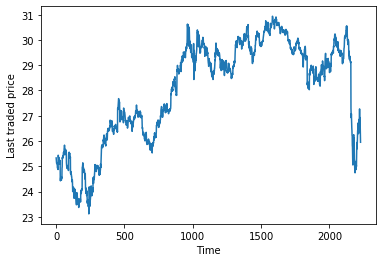

In [72]:
# Plotting close prices:
#df30min.Ultima.plot()
sns.lineplot(data=df30min.Ultima)
plt.xlabel('Time')
plt.ylabel('Last traded price')
plt.show()

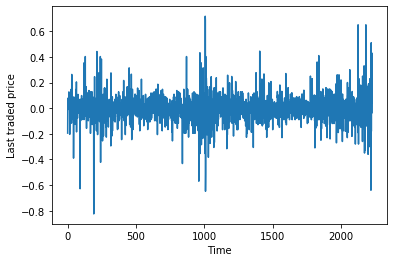

In [73]:
sns.lineplot(data=(df30min.Abertura - df30min.Ultima))
plt.xlabel('Time')
plt.ylabel('Last traded price')
plt.show()

## 1.1: Finding data type and features without auto-collinearity:

    - Our series (features) should contain independent observations. If not,
    this will have consequences when building regressive models which will
    mislead our interpretations and predictions;

    - It is preferable tick-bar, volume-bar or imbalance-bar, which have
    lower collinearity than time based bars.

    - Gaps between trade sessions, in time based bars, have a negative
    impact in ML prediction accuracy.

In [58]:
# Checking auto-correlations:
for i in df30min.columns[2:]:
    print('{}:      '.format(i), df30min[i].autocorr())

Abertura:       0.997815966358893
Maxima:       0.9980188132721973
Minima:       0.997694641259572
Ultima:       0.9978534031745122
Negocios:       0.565497559523146
Volume:       0.32867001591479944
Amplitude:       0.5072775743684663
Return:       0.0016825990317024771


**Volume, Negocios** are the best features for fitting our ML
models because they have the least auto-collinearity among the others.

## 1.2: Finding and checking multi-collinearity:

    - We can create pairwised features between 2 features with high
    collinearity.

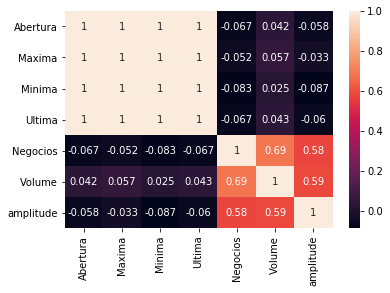

In [35]:
# Checking correlations between features:
sns.heatmap(data=df30min.corr(), annot=True)
plt.show()


Since, **Abertura, Maxima, Minima, Ultima** have the highest
multi-collinearity, then we will create pairwised features from them:

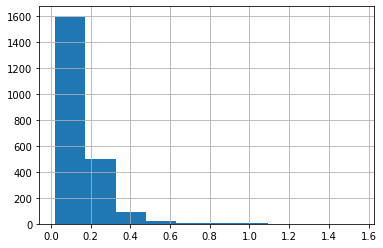

Amplitude:  0.5072775743684663


In [65]:
# Creating feature with the difference between max and min:
df30min['Amplitude'] = df30min.Maxima - df30min.Minima

# Printing distribution:
df30min.Amplitude.hist()
plt.show()

print('Amplitude: ', df30min['Amplitude'].autocorr())

- Still high auto-collinearity and not normally distributed.

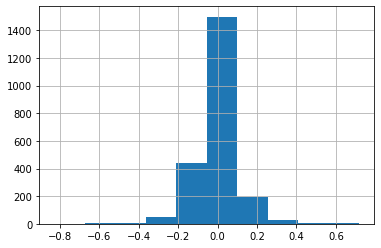

Return:  0.0016825990317024771


In [66]:
# Creating feature with the return of the period:
df30min['Return'] = df30min.Abertura - df30min.Ultima

# Printing distribution:
df30min.Return.hist()
plt.show()

print('Return: ', df30min['Return'].autocorr())

- **Very low auto-collinearity and also normally distributed.**

- This is exactly what we are looking for!